###### IMPORTING LIBRARIES

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
import plotly.express as px

###### LOADING THE DATASET

In [6]:
df = pd.read_csv("2015.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


The  **World Happiness Report**, published by the Earth Institute and co-edited by the institute’s director, Jeffrey Sachs, reflects a new worldwide demand for more attention to happiness and absence of misery as criteria for government policy. It reviews the state of happiness in the world today and shows how the new science of happiness explains personal and national variations in happiness.  It contains articles and rankings of national happiness, based on respondent ratings of their own lives, which the report also correlates with various (quality of) life factors.

The report being published since 2012 to our day, giving insights about the happiness ranks of different countries around the world. The data has five csv's which includes different years' happiness rankings. 

Data is collected from people in over 150 countries. Each variable measured reveals a populated-weighted average score on a scale running from 0 to 10 that is tracked over time and compared against other countries. These variables currently include:

- real GDP per capita
- social support
- healthy life expectancy
- freedom to make life choices
- generosity
- perceptions of corruption

In [6]:
print("number of rows and columns: ", df.shape)
print("number of total elements in the dataset: ",df.size)

number of rows and columns:  (158, 12)
number of total elements in the dataset:  1896


In [5]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [8]:
print("number of unique values in each column: \n",df.nunique())

number of unique values in each column: 
 Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64


###### Renaming columns 

In [9]:
df = df.rename(columns={'Happiness Rank': 'Rank',
                        'Happiness Score' : 'Score',
                        'Economy (GDP per Capita)' : 'GDP',
                        'Health (Life Expectancy)' : 'Life Expectancy',
                        'Trust (Government Corruption)': 'Trust'})

# Create a year column
df['Year'] = pd.to_datetime(2015, format='%Y').year



In [10]:
df.columns

Index(['Country', 'Region', 'Rank', 'Score', 'Standard Error', 'GDP', 'Family',
       'Life Expectancy', 'Freedom', 'Trust', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')

In [11]:
df.dtypes

Country               object
Region                object
Rank                   int64
Score                float64
Standard Error       float64
GDP                  float64
Family               float64
Life Expectancy      float64
Freedom              float64
Trust                float64
Generosity           float64
Dystopia Residual    float64
Year                   int64
dtype: object

In [12]:
df.isnull().sum()

Country              0
Region               0
Rank                 0
Score                0
Standard Error       0
GDP                  0
Family               0
Life Expectancy      0
Freedom              0
Trust                0
Generosity           0
Dystopia Residual    0
Year                 0
dtype: int64

In [14]:
# there is no null values

**FEATURES**

In [40]:
df["Country"].unique()

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland',
       'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel',
       'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil',
       'Luxembourg', 'Ireland', 'Belgium', 'United Arab Emirates',
       'United Kingdom', 'Oman', 'Venezuela', 'Singapore', 'Panama',
       'Germany', 'Chile', 'Qatar', 'France', 'Argentina',
       'Czech Republic', 'Uruguay', 'Colombia', 'Thailand',
       'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'Kuwait', 'Suriname',
       'Trinidad and Tobago', 'El Salvador', 'Guatemala', 'Uzbekistan',
       'Slovakia', 'Japan', 'South Korea', 'Ecuador', 'Bahrain', 'Italy',
       'Bolivia', 'Moldova', 'Paraguay', 'Kazakhstan', 'Slovenia',
       'Lithuania', 'Nicaragua', 'Peru', 'Belarus', 'Poland', 'Malaysia',
       'Croatia', 'Libya', 'Russia', 'Jamaica', 'North Cyprus', 'Cyprus',
       'Algeria', 'Kosovo', 'Turkmenistan', 'Mauritius', 'Hong Kong',
       'Estonia', 'Indonesi

In [41]:
df["Region"].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [42]:
df["Rank"].value_counts()

82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: Rank, Length: 157, dtype: int64

In [43]:
df["Score"].value_counts()

5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Score, Length: 157, dtype: int64

In [44]:
df["Standard Error"].value_counts()

0.03780    2
0.03751    2
0.04394    2
0.05051    2
0.04934    2
          ..
0.04114    1
0.04251    1
0.03843    1
0.05371    1
0.06727    1
Name: Standard Error, Length: 153, dtype: int64

In [45]:
df["GDP"].value_counts()

1.39651    1
0.39753    1
1.15406    1
1.02564    1
1.12094    1
          ..
1.12254    1
1.18498    1
1.14723    1
0.59325    1
0.20868    1
Name: GDP, Length: 158, dtype: int64

In [46]:
df["Family"].value_counts()

1.34951    1
0.43106    1
0.92933    1
0.80001    1
1.20215    1
          ..
1.12241    1
1.27385    1
1.25745    1
1.14184    1
0.13995    1
Name: Family, Length: 158, dtype: int64

In [47]:
df["Life Expectancy"].value_counts()

0.92356    2
0.94143    1
0.60268    1
0.88213    1
0.83947    1
          ..
0.66098    1
0.64368    1
0.87337    1
0.73128    1
0.28443    1
Name: Life Expectancy, Length: 157, dtype: int64

In [48]:
df["Freedom"].value_counts()

0.66557    1
0.40820    1
0.07699    1
0.33916    1
0.32112    1
          ..
0.51649    1
0.60855    1
0.21342    1
0.55475    1
0.36453    1
Name: Freedom, Length: 158, dtype: int64

In [49]:
df["Trust"].value_counts()

0.32524    2
0.07625    1
0.01397    1
0.04582    1
0.02758    1
          ..
0.03787    1
0.01031    1
0.19317    1
0.05989    1
0.10731    1
Name: Trust, Length: 157, dtype: int64

In [50]:
df["Generosity"].value_counts()

0.29678    1
0.21222    1
0.00000    1
0.21854    1
0.12800    1
          ..
0.11827    1
0.25328    1
0.02641    1
0.27815    1
0.16681    1
Name: Generosity, Length: 158, dtype: int64

In [51]:
df["Dystopia Residual"].value_counts()

2.51738    1
2.51767    1
1.80101    1
1.57059    1
1.24074    1
          ..
2.24729    1
1.61583    1
2.44649    1
2.32407    1
1.56726    1
Name: Dystopia Residual, Length: 158, dtype: int64

In [52]:
df["Score"].max()

7.587

In [53]:
df["Score"].min()

2.839

In [60]:
def get_heatmap(data: pd.DataFrame, year: str):  
    fig, ax = plt.subplots(figsize=(11, 8)) 
    sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=3, cmap='coolwarm',
              ax=ax, annot_kws={'size': 12, 'color':'black'})
    ax.set_title('Data - ' + year, fontsize=15, fontweight='bold', pad=5)
    plt.xticks(rotation=45, weight='bold')
    plt.yticks(weight='bold')
    plt.show()
    
    
def get_vif(dataframe: pd.DataFrame) -> pd.DataFrame:
    """
    This function calculated VIF of the given dataframe, 
    returns Variance Inflation Factor as a dataframe.
    """
    dataframe = dataframe._get_numeric_data()
    vif_df = pd.DataFrame()
    vif_df['columns'] = dataframe.columns
    vif_df['VIF Value'] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return(vif_df)


def subplot_score(data: pd.DataFrame, year: str):
    fig, ax = plt.subplots(2, 3, figsize=(18, 8))

    plot_columns = ['GDP', 'Family', 'Life Expectancy', 'Freedom', 'Trust', 'Generosity']
    plot_color = ['red', 'green', 'blue', 'purple', 'yellow', 'orange']

    for i in range(6):
        m = i // 3
        n = i % 3

        ax[m, n].scatter('Score', plot_columns[i], data=df, color=plot_color[i],
                    marker='o')
        ax[m, n].set_xlabel('Score', fontweight='bold') 
        ax[m, n].set_ylabel(plot_columns[i], fontweight='bold')

    fig.suptitle('Score variable in data ' + year, fontsize=16)
    plt.show()
    
    
def get_seaborn_bar(data: pd.DataFrame, y: str, plot_title: str, 
                    plot_color:str = 'Paired', title_color: str = 'black'):
    fig, ax = plt.subplots(1, 1, figsize=(15, 7))

    plot = sns.barplot(ax=ax, x=df['Country'], y=data[y],
                     palette=sns.color_palette(plot_color, data.shape[0]))

    for index, row in data.iterrows():
        plot.text(x=index, y=row[y]*1.01, s=round(row['Score'], 2), 
                  ha='center', color='black')

    ax.set_title(plot_title, fontdict={'fontweight':'bold', 'color':title_color})
    ax.set_xticklabels(textwrap.fill(x.get_text(), 7, subsequent_indent='-') for x in ax.get_xticklabels())
    ax.set_xlabel('Country', fontweight='bold')
    ax.set_ylabel(y, fontweight='bold')
    return ax

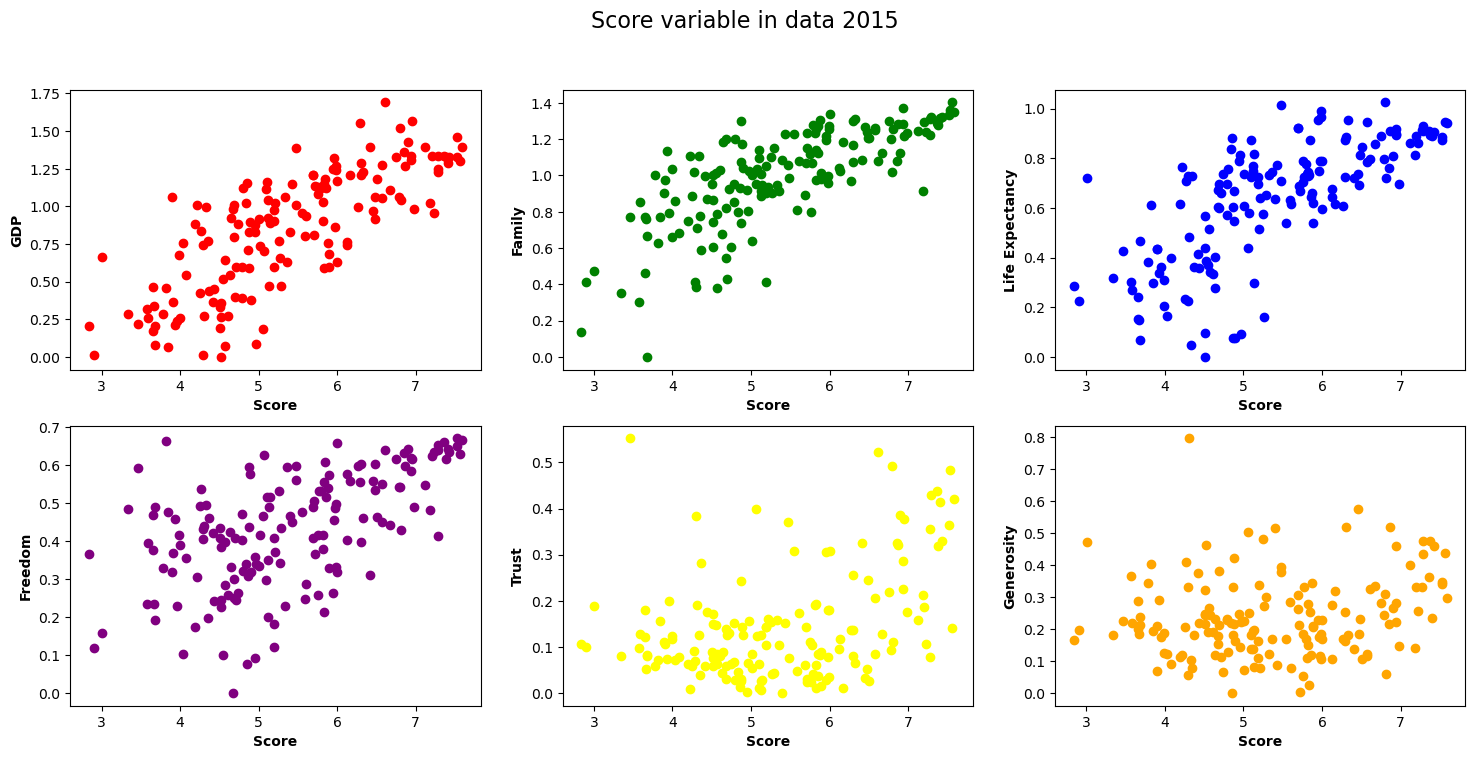

In [63]:
subplot_score(data=df, year='2015')

- GDP, Family Support, Life Expectancy, and Freedom are highly correlated with Happiness scores of the countries.- 

In [54]:
# Dividing dataset on the basis of score
unhappy = df[df['Score'] < 5]
happy = df[df['Score'] >= 5]

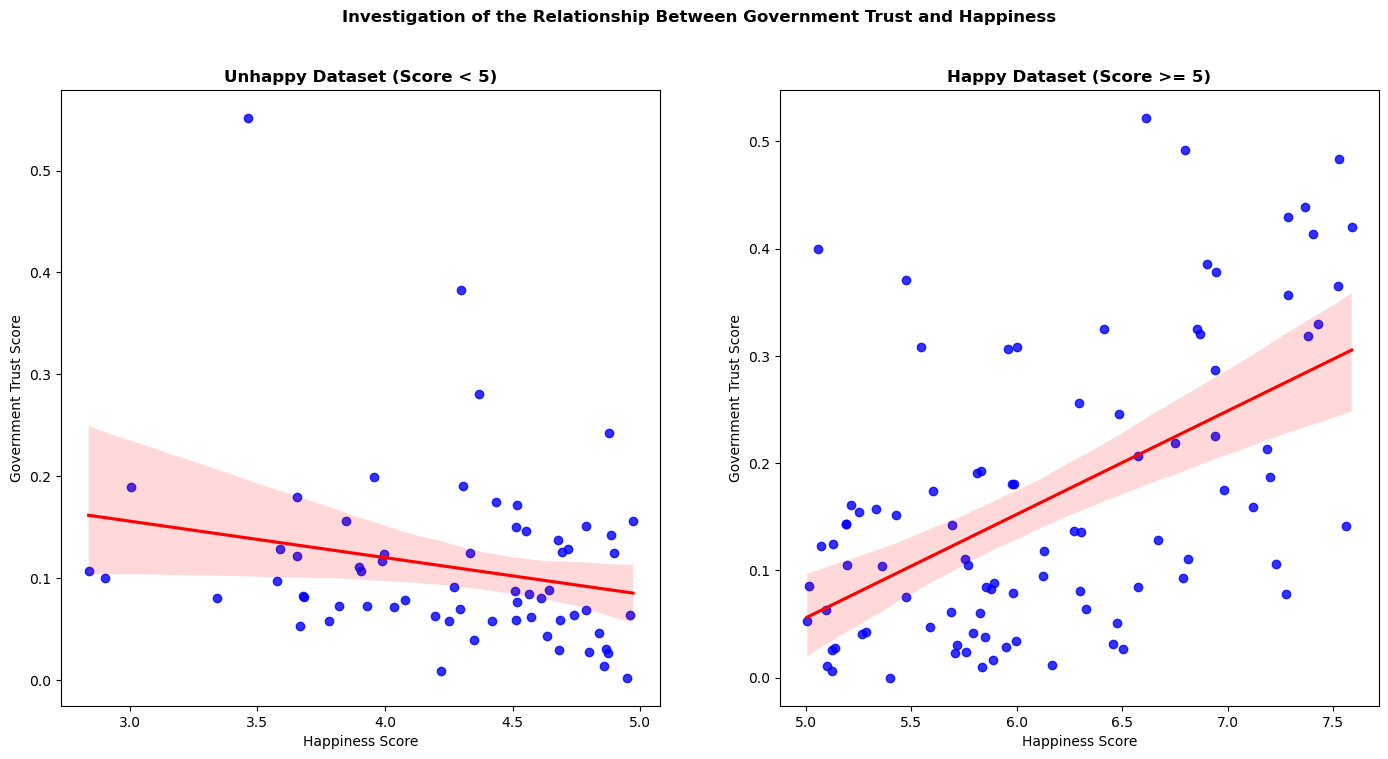

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(17, 8))

plot_1 = sns.regplot(x='Score', y='Trust', data=unhappy, 
                     ax=ax[0], line_kws={"color": "red"}, 
                     scatter_kws={"color": "blue"})
ax[0].set_title('Unhappy Dataset (Score < 5)', fontweight='bold')
ax[0].set_xlabel('Happiness Score') 
ax[0].set_ylabel('Government Trust Score')

plot_2 = sns.regplot(x='Score', y= 'Trust', data= happy, 
                     ax=ax[1], line_kws={"color": "red"},
                     scatter_kws={"color": "blue"})
ax[1].set_title('Happy Dataset (Score >= 5)', fontweight='bold')
ax[1].set_xlabel('Happiness Score') 
ax[1].set_ylabel('Government Trust Score')

fig.suptitle('Investigation of the Relationship Between Government Trust and Happiness', fontweight='bold')
plt.show()

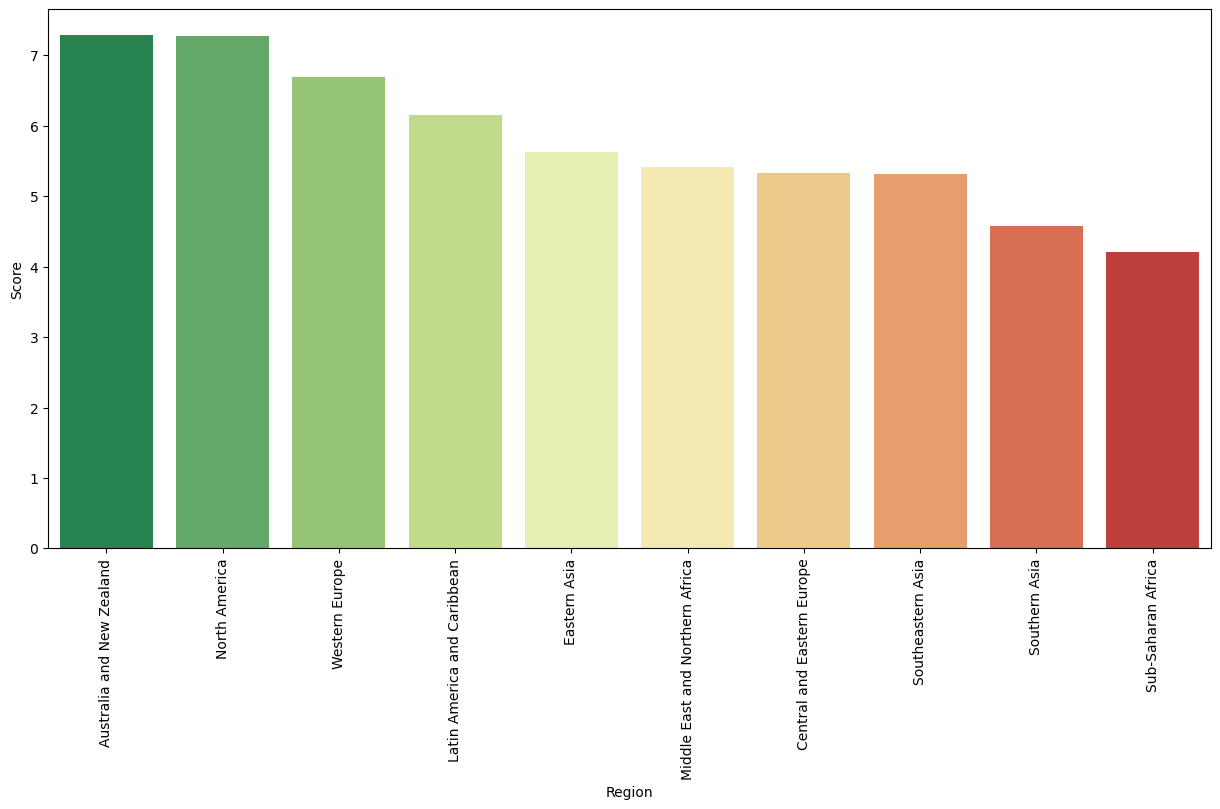

In [73]:
region_mean = df.groupby('Region')['Score'].mean().sort_values(ascending=False)
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
plot = sns.barplot(x=region_mean.index, y=region_mean, ax=ax, palette=sns.color_palette("RdYlGn_r", len(region_mean)))
plt.xticks(rotation=90)
plt.show()

- Australia, New Zealand and North America have the highest happiness score while Sub Saharan Africa has lowest happiness score

###### Who is the top Happiest and least Happiest

In [86]:
top_happy_countries =df.sort_values('Score', ascending= False).head(n=15)
top_sad_countries = df.sort_values('Score', 
                                         ascending= False).tail(n=15)[::-1].reset_index(drop=True)

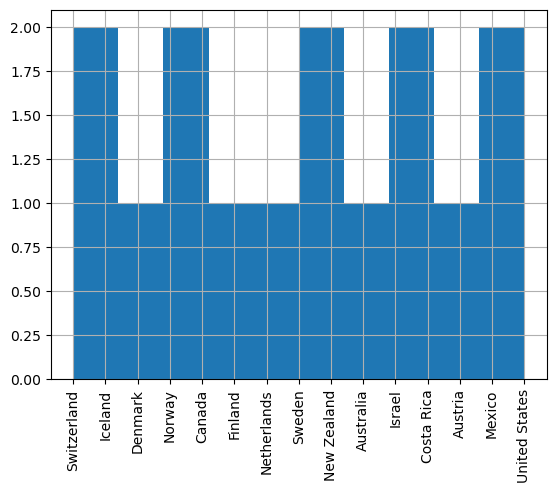

In [84]:
plt.hist(top_happy_countries["Country"])
plt.grid()
plt.xticks(rotation=90)
plt.show()

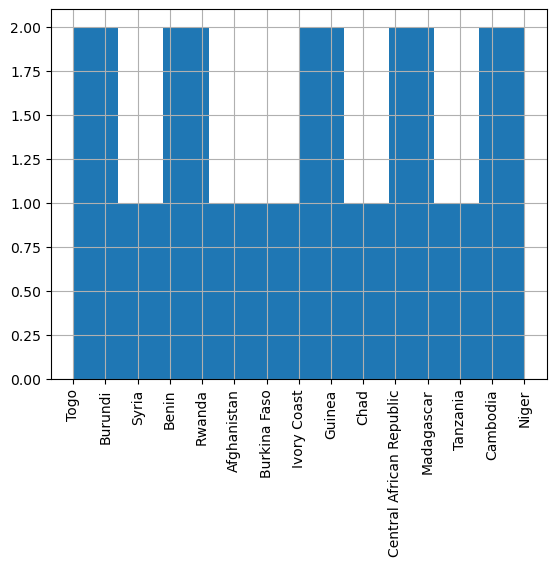

In [87]:
plt.hist(top_sad_countries["Country"])
plt.grid()
plt.xticks(rotation=90)
plt.show()

###### Can Money Buy Happiness?

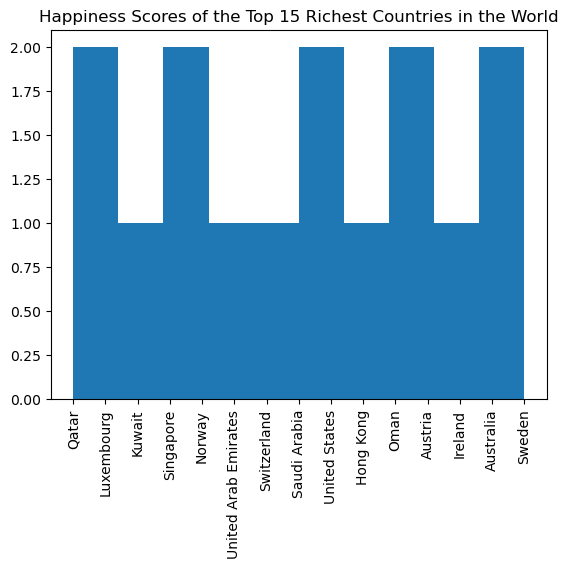

In [92]:
richests = df.sort_values('GDP',ascending=False).head(n=15).reset_index(drop=True)
plt.hist(richests["Country"])
plt.title('Happiness Scores of the Top 15 Richest Countries in the World')
plt.xticks(rotation=90)
plt.show()

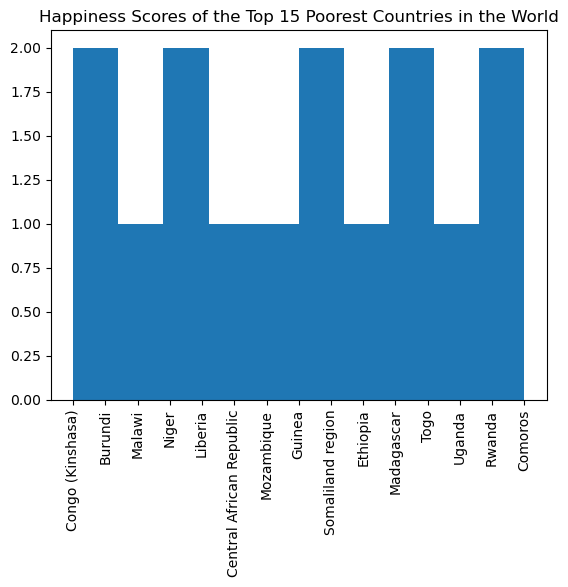

In [95]:
poorests = df.sort_values('GDP',ascending=True).head(n=15).reset_index(drop=True).reset_index(drop=True)
plt.hist(poorests["Country"])
plt.title('Happiness Scores of the Top 15 Poorest Countries in the World')
plt.xticks(rotation=90)
plt.show()

- For the richest, we see they have a happiness score of minimum 5.47 but as you can see this is an outlier. The next country has a score of 6.29. While the happiest country has a score of 7.49 we can say money can bring you a good amount of happiness. But it is obvious that you can't rely your happiness on money only.
- For the unwealthy countries, Congo - Kinshasa, has a happiness score of 4.52 and Malawi, the 3rd, has 4.29. The happiest among the unwealthy countries is Somali with a score of 5.06. This bar chart supports our discussion that money effects happiness but you cannot rely everything on money. But keep it in mind that money has a good effect on happiness.

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,158.0,79.493671,45.754363,1.00000,40.250000,79.500000,118.750000,158.00000
Score,158.0,5.375734,1.145010,2.83900,4.526000,5.232500,6.243750,7.58700
Standard Error,158.0,0.047885,0.017146,0.01848,0.037268,0.043940,0.052300,0.13693
GDP,158.0,0.846137,0.403121,0.00000,0.545808,0.910245,1.158448,1.69042
Family,158.0,0.991046,0.272369,0.00000,0.856823,1.029510,1.214405,1.40223
Life Expectancy,158.0,0.630259,0.247078,0.00000,0.439185,0.696705,0.811013,1.02525
Freedom,158.0,0.428615,0.150693,0.00000,0.328330,0.435515,0.549092,0.66973
Trust,158.0,0.143422,0.120034,0.00000,0.061675,0.107220,0.180255,0.55191
Generosity,158.0,0.237296,0.126685,0.00000,0.150553,0.216130,0.309883,0.79588
Dystopia Residual,158.0,2.098977,0.553550,0.32858,1.759410,2.095415,2.462415,3.60214


In [96]:
corr = df.corr()

<Axes: >

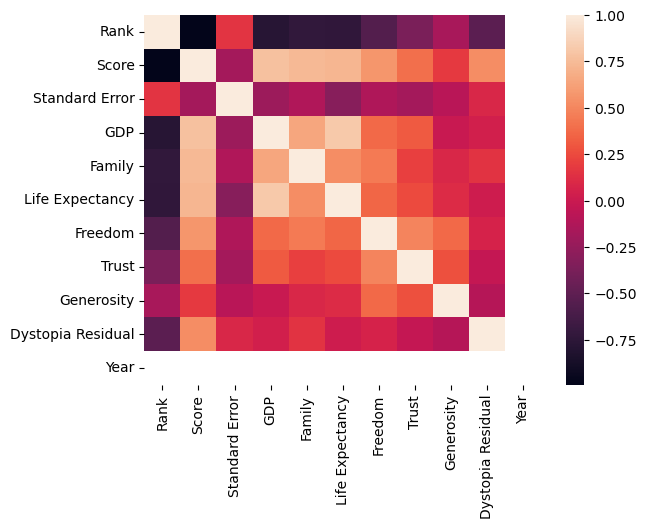

In [99]:
sns.heatmap(corr)

###### OUTLIERS

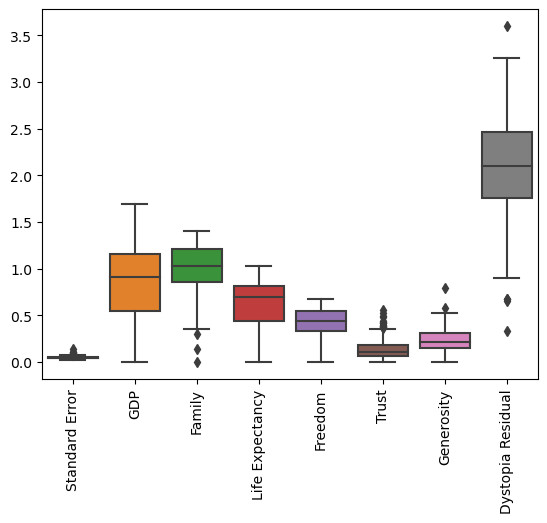

In [105]:
sns.boxplot(data = df.drop(['Rank', 'Year', 'Score'], axis=1))
plt.xticks(rotation=90)
plt.show()

**CONCLUSIONS:**
- Australia, New Zealand and North America have the highest happiness score while Sub Saharan Africa has lowest happiness score
- For the richest, we see they have a happiness score of minimum 5.47 but as you can see this is an outlier. The next country has a score of 6.29. While the happiest country has a score of 7.49 we can say money can bring you a good amount of happiness. But it is obvious that you can't rely your happiness on money only.
- For the unwealthy countries, Congo - Kinshasa, has a happiness score of 4.52 and Malawi, the 3rd, has 4.29. The happiest among the unwealthy countries is Somali with a score of 5.06. This bar chart supports our discussion that money effects happiness but you cannot rely everything on money. But keep it in mind that money has a good effect on happiness.